In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [25]:
df=pd.read_excel("glass.xlsx",sheet_name="glass")

In [27]:
# 1.EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

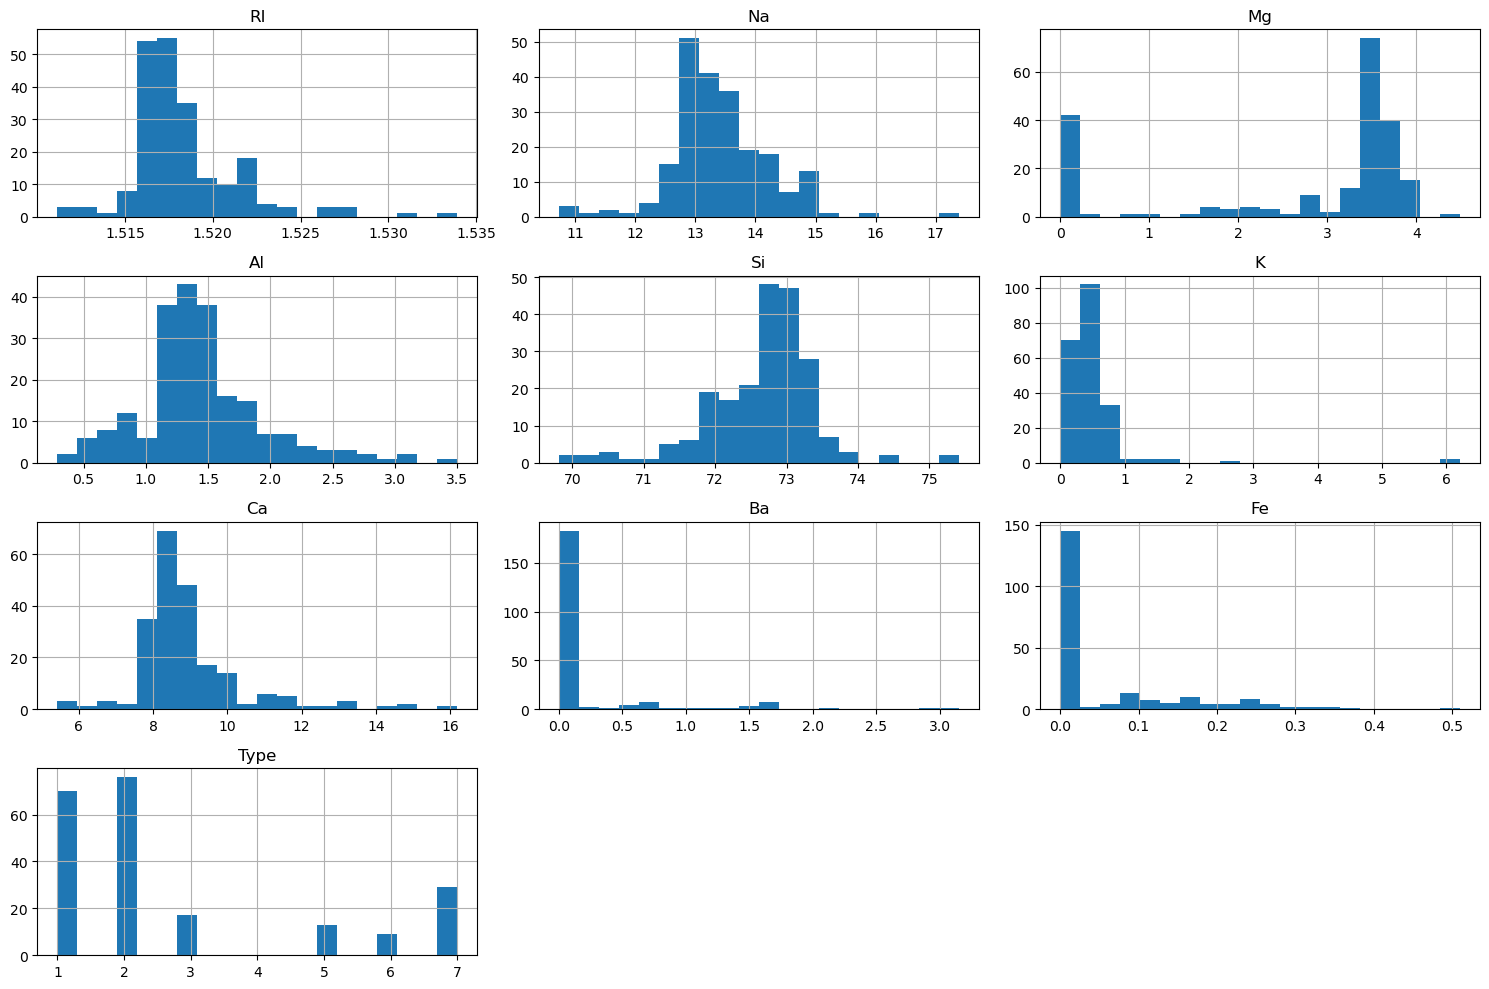

In [26]:
# 2. Data Visualization
# Histograms
df.hist(bins=20,figsize=(15,10))
plt.tight_layout()
plt.show()

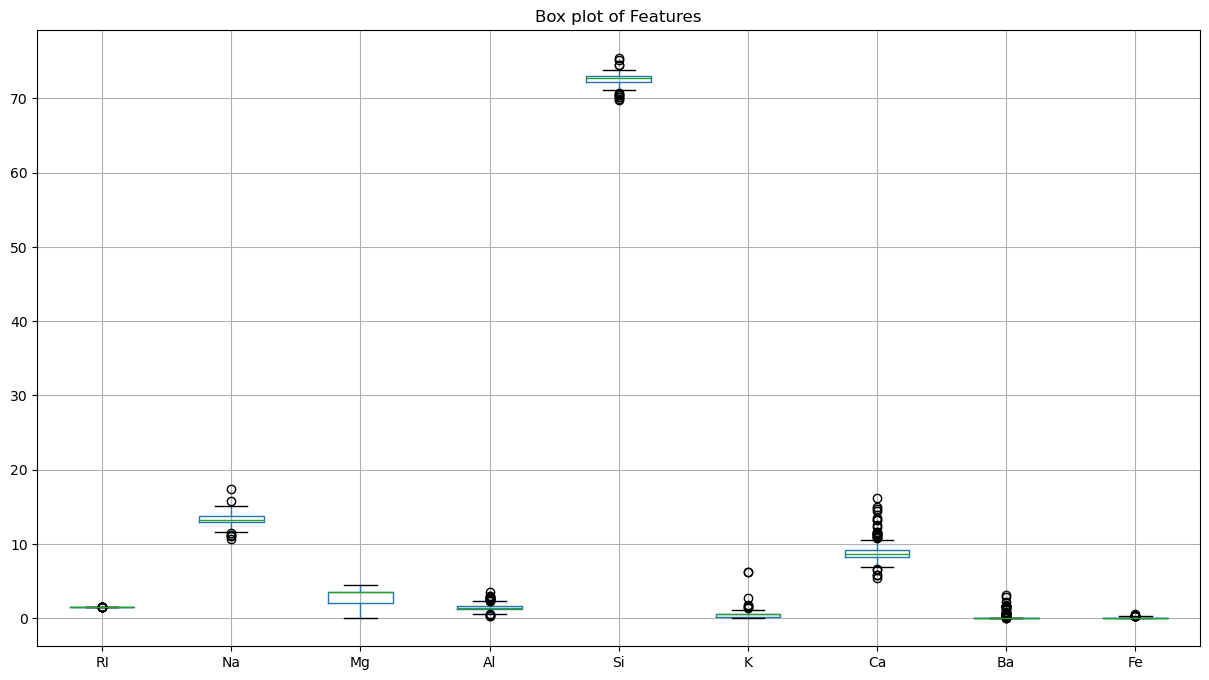

In [28]:
# Box plots
plt.figure(figsize=(15,8))
df.drop(columns='Type').boxplot()
plt.title("Box plot of Features")
plt.show()

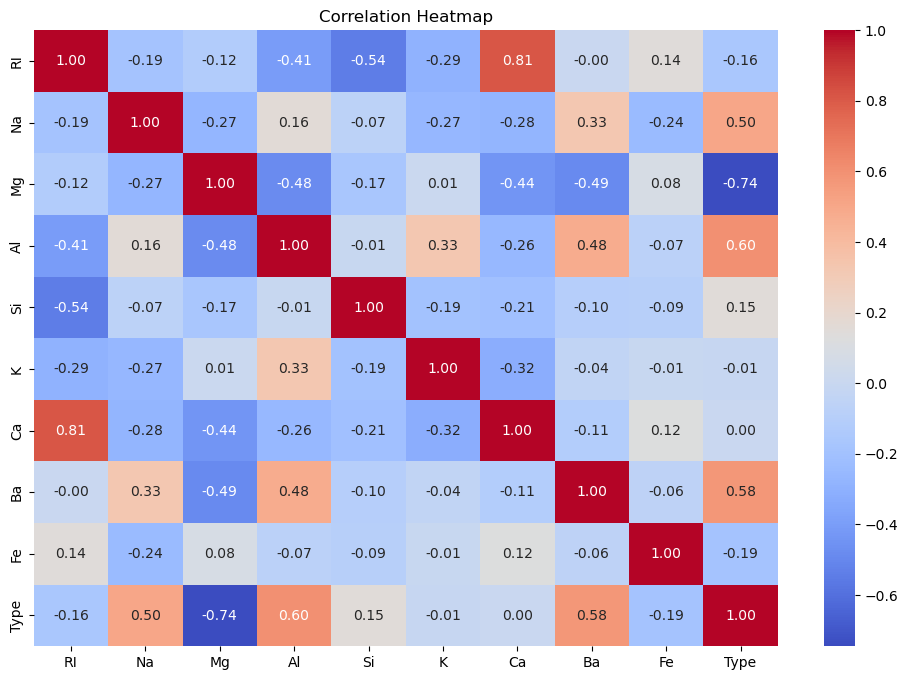

In [29]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
# 3. Data Preprocessing
X=df.drop(columns='Type')
y=df['Type']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
# 4. Random Forest Model Implementation
# Train-test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [32]:
# Random Forest
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

In [34]:
# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test,y_pred_rf))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
print("Accuracy:",accuracy_score(y_test,y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43

Confusion Matrix:
 [[12  1  1  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Accuracy: 0.813953488372093


In [35]:
# 5. Bagging
bagging_model=BaggingClassifier(random_state=42)
bagging_model.fit(X_train,y_train)
y_pred_bag=bagging_model.predict(X_test)
print("\nBagging Classification Report:")
print(classification_report(y_test,y_pred_bag))
print("Accuracy:",accuracy_score(y_test,y_pred_bag))


Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.67      0.67      0.67        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.50      0.50      0.50         2
           7       0.71      0.83      0.77         6

    accuracy                           0.70        43
   macro avg       0.71      0.67      0.69        43
weighted avg       0.70      0.70      0.70        43

Accuracy: 0.6976744186046512


In [36]:
# Boosting (AdaBoost)
boost_model=AdaBoostClassifier(random_state=42)
boost_model.fit(X_train,y_train)
y_pred_boost=boost_model.predict(X_test)
print("\nBoosting (AdaBoost) Classification Report:")
print(classification_report(y_test,y_pred_boost))
print("Accuracy:",accuracy_score(y_test,y_pred_boost))

C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Boosting (AdaBoost) Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.42      0.33      0.37        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         2
           7       1.00      0.50      0.67         6

    accuracy                           0.53        43
   macro avg       0.41      0.46      0.40        43
weighted avg       0.48      0.53      0.48        43

Accuracy: 0.5348837209302325


C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

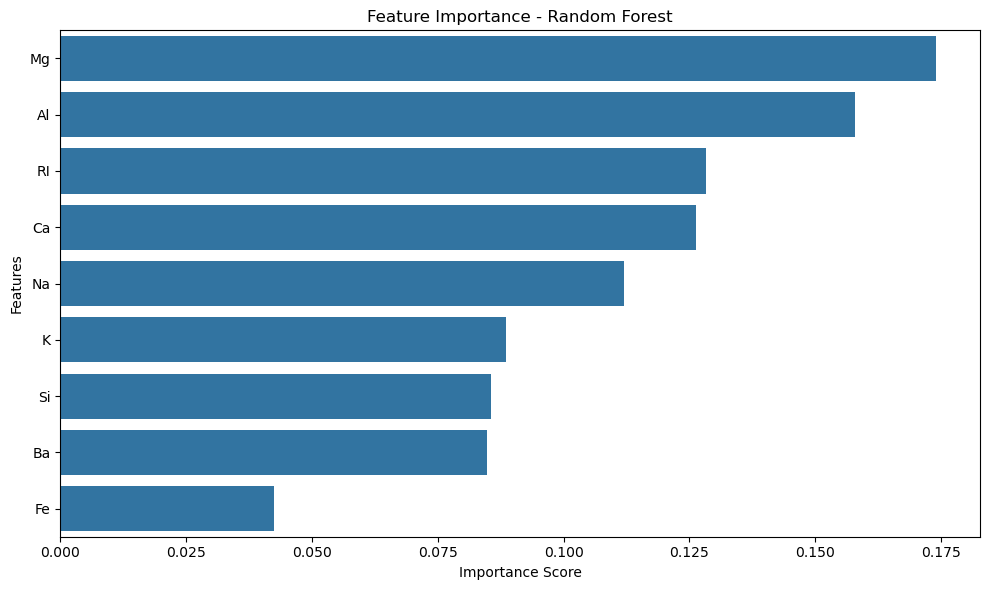

In [37]:
# Feature Importance
plt.figure(figsize=(10,6))
importances=rf_model.feature_importances_
features=X.columns
indices=np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices],y=[features[i] for i in indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [1]:
#1. Bagging vs Boosting

#Bagging (Bootstrap Aggregating):

#Builds multiple independent models in parallel using random subsets of data (with replacement).
#Combines results by majority vote (classification) or averaging (regression).
#Example: Random Forest.

#Boosting:

#Builds models sequentially, where each model tries to correct errors of the previous one.
#Focuses more on hard-to-predict samples by assigning higher weights.
#Example: AdaBoost, Gradient Boosting.

#Difference:

#Bagging = parallel, reduces variance.
#Boosting = sequential, reduces bias.

In [ ]:
#2. Handling Imbalanced Data

#Resampling: Oversample minority class (SMOTE) or undersample majority class.
#Use appropriate metrics: Precision, Recall, F1-score, AUC instead of accuracy.
#Algorithmic methods: Use algorithms that handle imbalance (e.g., XGBoost with scale_pos_weight).
#Generate synthetic samples: SMOTE, ADASYN.
#Cost-sensitive learning: Penalize misclassification of minority class more heavily.